In [47]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import minimize
from scipy.stats import chi2


# 0.2 Signal strength and distances

## a) 

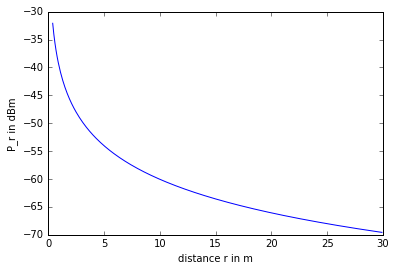

In [2]:
r = np.arange(0.4, 30, 0.1)
P_t = 0
c = 299792458
f = 2.4 * 10**9
P_r = P_t + 20 * np.log10(c / (4* np.pi* f* r))
plt.plot(r, P_r)
plt.ylabel("P_r in dBm")
plt.xlabel("distance r in m")
plt.show()

Q: For which is a router more sensitive when it comes to the distance to a device, devices that are close or devices that are far away, and why?

A: It is more sensitive to devices that are close, since the absolute derivative decreases when the distance increases. So the difference between the router and the device is less accurate determined over greater distance.

## b)

$$ P_r = P_t + 20 \times log_{10}(\frac{c}{4 \pi f r}) \\
\frac{P_r - P_t}{20} =log_{10}(\frac{c}{4 \pi f r}) \\
10^{\frac{P_r - P_t}{20} }=\frac{c}{4 \pi f r} \\
r \times 10^{\frac{P_r - P_t}{20} }=\frac{c}{4 \pi f} \\
r = \frac{c}{4 \pi f \times 10^{\frac{P_r - P_t}{20} }} $$

## c)

In [3]:
r_30 = c / (4 * np.pi * f * np.power(10,(30.0/20)))

r_31 = c / (4 * np.pi * f * np.power(10,(31.0/20)))
r_60 = c / (4 * np.pi * f * np.power(10,(60.0/20)))
r_61 = c / (4 * np.pi * f * np.power(10,(61.0/20)))
r_d1 = r_30 - r_31
r_d2 = r_60 - r_61
print ("The difference between 30 dBm and of  31 dBm is:",r_d1)
print ("The difference between 60 dBm and of  61 dBm is:",r_d2)

The difference between 30 dBm and of  31 dBm is: 3.41841760426e-05
The difference between 60 dBm and of  61 dBm is: 1.08099856231e-06


## d) 

Q: For which case does an uncertainty on the measured signal strength translate to a larger uncertainty on the distance, for a larger signal strength of e.g. 30 dBm or for a smaller signal strength of e.g. 60 dBm, and why?

A: When a packet is received two factors play a role in the uncertainty. The first is the interference from the 'real world'. When the packet has a weaker signal strength it is send from farther away and has a higher likelihood of interference thus increasing the uncertainty. The second factor is a change in the distance. According to the plot from a), if the distance is short and changes a bit the resulting signal strength varies a lot. But when the distance is large and changes by the same amount the resulting signal strength varies much less. Therefore the influence will have a smaller impact for short distances compared to large distances.


# 0.3 Position reconstruction

## e)

Q: Explain and draw an example of why there will not be an exact intersection point?

A: Because there is some noise in the measured signal intensity at the routers, and the noise measured at the three routers for the same signal will be different, the three routers will all measure a distance that is slighly different from the actual distance. Now if we look at the theoretical case of three circels with one intersection point and we change the radius of one of the circles a little bit, we see that the three circles now have no common intersection point and 6 points where two circles intersect.

<img src="intersection.png">

## f)

In [7]:
%%latex
\begin{align*}
P_r &= P_t + 20*log^{10}(\frac{c}{4\pi fr})\\
&= P_t + 20*(log^{10}(\frac{c}{4\pi f}) + log^{10}(\frac{1}{r}))\\
&= P_t + 20*(log^{10}(\frac{c}{4\pi f}) - log^{10}(r))\\
&\text{and (De Gua)}\\
r &= \sqrt{(x-x_i)^2 + (y-y_i)^2 + Z^2}\\
&\text{so we get}\\
P_r &= P_t + 20*log^{10}(\frac{c}{4\pi f}) - 20*log^{10}(\sqrt{(x-x_i)^2 + (y-y_i)^2 + Z^2})\\
 &= P_t + 20*log^{10}(\frac{c}{4\pi f}) - 10*log^{10}((x-x_i)^2 + (y-y_i)^2 + Z^2)
\end{align*}


<IPython.core.display.Latex object>

## g)

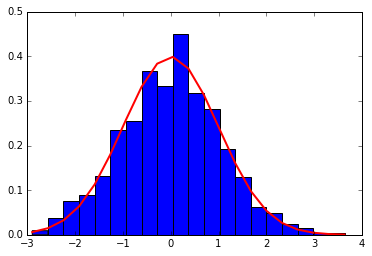

In [16]:
def friis_function(const):

   
    x_router = 0
    y_router = 0
    x_device = 20
    y_device = 0
    Z = 2
    p_t = 0
    r = math.sqrt((x_device-x_router)^2 + (y_device-y_router)^2 + Z^2)

    p_r = p_t + const * np.log10(c / (4.0 * np.pi * f * r))
    return p_r

#the mean and sigma used for creating the gaussian noise
mu = 0.0
sigma = 1.0

#creating the gaussian package noise
package_noise = np.random.normal(mu, sigma, 1000)

#creating the expected signal strentgh at the router
expected = friis_function(20)

#creating the expected signal with noise
measurements = [expected + noise1 for noise1 in package_noise]

#creating the normalized residuals
normalized_residuals = [(measurement - expected)/1 for measurement in measurements]


#make the histogram plot with the gaussian plotted over it in red
count, bins, ignored = plt.hist(normalized_residuals, 20, normed=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
        linewidth=2, color='r')
plt.show()


Q: What is the mean and the standard deviation of the pull distribution?

A: The mean is 0 and the standard deviation is 1.

## h)

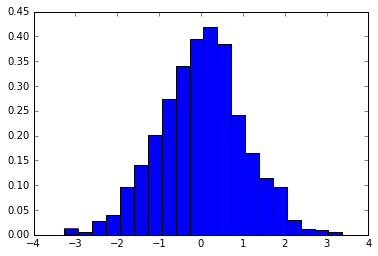

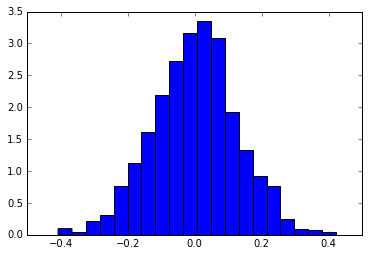

In [11]:
sigma = 2.0

#creating the gaussian package noise
package_noise = np.random.normal(mu, sigma, 1000)

#creating the normalized residuals
normalized_residuals = [(measurement - expected)/1 for measurement in measurements]

#make the histogram plot 
count, bins, ignored = plt.hist(normalized_residuals, 20, normed=True)
plt.show()

#creating the gaussian package noise
package_noise = np.random.normal(mu, sigma, 1000)

#creating the normalized residuals by 8
normalized_residuals = [(measurement - expected)/8 for measurement in measurements]

#make the histogram plot
count, bins, ignored = plt.hist(normalized_residuals, 20, normed=True)
plt.show()

Q: What happens to the pull distribution if you underestimate the noise/fluctuation/measurement uncertainties? And what will happen if you overestimate?

A: If we underestimate the noise, the standard deviation of the pull distribution becomes larger, showing values way above 1 (meaning much noise). If we overestimate the noise, the standard deviation becomes small showing values lower than 1, which would mean that there is no noise (while there actually is noise).

## i)

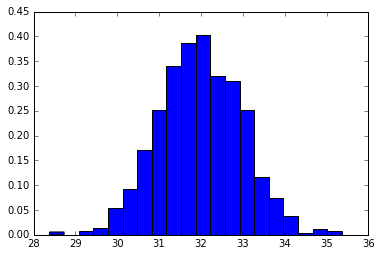

In [15]:
#sigma used for creating the gaussian noise
sigma = 1.0

#creating the gaussian package noise
package_noise = np.random.normal(mu, sigma, 1000)

#creating the expected signal strentgh at the router
expected = friis_function(20.0)

#creating the signal strentgh with factor 25 
measure_friis = friis_function(25.0)

#adding the gaussian noise 
measurements = [measure_friis + noise1 for noise1 in package_noise]

#creating the normalized residuals
normalized_residuals = [(measurement - expected)/1 for measurement in measurements]


#make the histogram plot with the gaussian plotted over it in red
count, bins, ignored = plt.hist(normalized_residuals, 20, normed=True)
plt.show()

Q: What happens to the pull distribution if you have such a systematic error in your model?

A: The mean is shifted.

## j)

Q:What do you want to see in your pull distribution to convince you that your model is correct and your uncertainties properly estimated?

A:You want to see a spread over 4 sigmas and a centration on the 0, which means the mean is at the 0 point.

# 0.4 Toy Monte Carlo

## k)

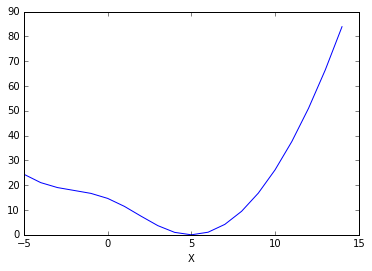

In [41]:
P_t = 0 #transmission power
Z = 2 # height of router - height of device
routers = [(0,0), (0,20), (20,20), (20, 0)] #router position
S_x = 5 #true x-position
S_y = 5 #true y-position 
noise = 0

#create Friis function
def P_r(r):
    P_r = P_t + 20 * np.log10(c / (4* np.pi* f* r))
    return P_r

#create Chi-function
def chi_squared(Sis, x, y, routers=[], Z=2, sigma=1):
    chi = 0
    for i, (x_i, y_i) in enumerate(routers):
        S_i = Sis[i]
        r = math.sqrt((x - x_i)**2 + (y - y_i)**2 + Z**2)
        chi += ((P_r(r) - S_i)**2)/sigma**2
    return chi

#function to calculate signal strength at each router
def calculate_S_is(S_x, S_y, routers, noise):
    Sis = []
    for (x_i, y_i) in routers:
        if noise:
            mu = 0
            sigma = noise
            package_noise = np.random.normal(mu, sigma, 1)[0]
        else:
            package_noise = 0
        S_r = math.sqrt((S_x - x_i)**2 + (S_y - y_i)**2 + Z**2)

        S_i = P_r(S_r) + package_noise
        Sis.append(S_i)
    return Sis
  
#calculate signal strength at each router
Sis = calculate_S_is(S_x, S_y, routers, noise)
 
# list for the chi-function results
y=5
chis = [] 
for x in range(-5, 15):
    chis.append(chi_squared(Sis,x, y, routers))

#plot chis 
plt.plot(range(-5, 15), chis)
plt.xlabel("X")
plt.show()

## l)

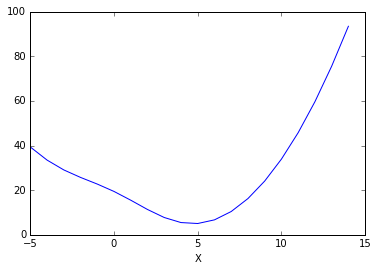

In [28]:
noise = 1

#calculate signal strength at each router with noise = 1
Sis = calculate_S_is(S_x, S_y, routers, noise)

#create list for the chi-function results
chis = []
for x in range(-5, 15):
    chis.append(chi_squared(Sis,x, y, routers))
    
#plot chis     
plt.plot(range(-5, 15), chis)
plt.xlabel("X")
plt.show()

Q: Does the minimun occur at the true position [5,5]? And what happens to the procedure if you repeat this for several times?

A: When the test is run several times the plot changes, although the minimum is generaly around x=5.

## m)

In [38]:
#calculate signal strength at each router with noise = 1
Sis = calculate_S_is(S_x, S_y, routers, noise)

#create list for the chi-function results
chis = []
for x in range(-5, 15):
    chis.append(chi_squared(Sis,x, y, routers))

#create chi-function for some point
def chi_squared_xy(xy):
    x,y = xy
    chi = chi_squared(Sis,x, y, routers)
    return chi

# create minimum of chi
x0 = [0,0]
res = minimize(chi_squared_xy, x0)
print( res.x )

[ 6.7228511   0.83030682]


## n)

Q: What are the avarage x- and y-position? What is the average  $ \chi^2 $ of the minimun?

A: The answers are provided in the plot below.

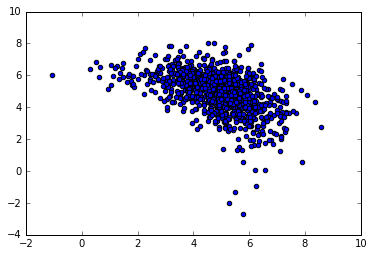

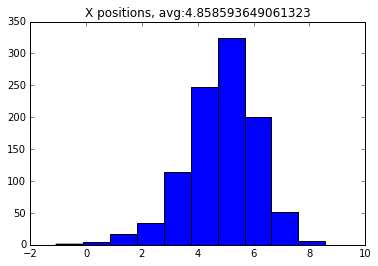

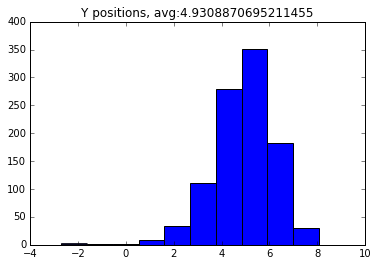

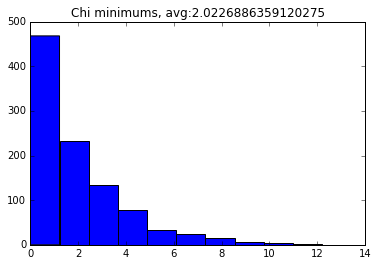

In [46]:
positions = []

Sis = calculate_S_is(S_x, S_y, routers, noise)
 
def chi_squared_xy(xy):
    x,y = xy
    chi = chi_squared(Sis,x, y, routers)
    return chi

packets = range(1000)
xs = []
ys = []
min_chis = []
for packet in packets:
    Sis = calculate_S_is(S_x, S_y, routers, noise)
    x0 = [0,0]
    res = minimize(chi_squared_xy, x0)
    [x,y] = res.x
    min_chis.append(res.fun)
    xs.append(x)
    ys.append(y)

plt.scatter(xs, ys)
plt.show()

plt.hist(xs)
plt.title("X positions, avg:{}".format(np.mean(xs)))
plt.show()

plt.hist(ys)
plt.title("Y positions, avg:{}".format(np.mean(ys)))
plt.show()


plt.hist(min_chis)
plt.title("Chi minimums, avg:{}".format(np.mean(min_chis)))
plt.show()


## o)

Q: Does the average $ \chi^2 $ of that minimums that you found in the previous item agree with the NDoF? 

A: The $\chi^2$ minimum is around 2, so that corresponds with our NDoF which is also 2.


## p)

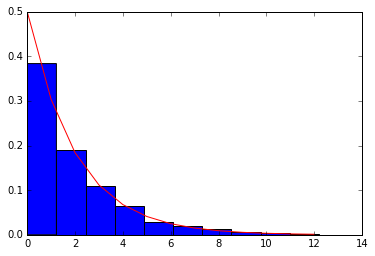

In [48]:
n, bins, patches = plt.hist(min_chis, normed=1)
mu = 0
k=2
dist = chi2(k, mu)
x = range(math.ceil(max(min_chis)))
plt.plot(x, dist.pdf(x), c='red')
plt.show()

## q)

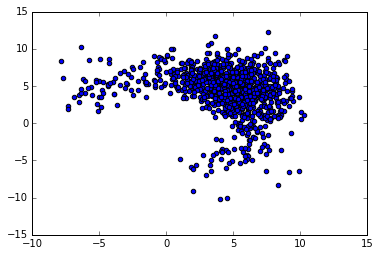

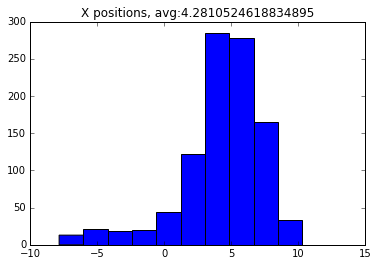

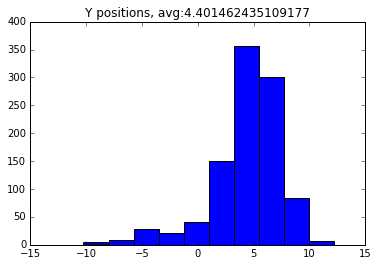

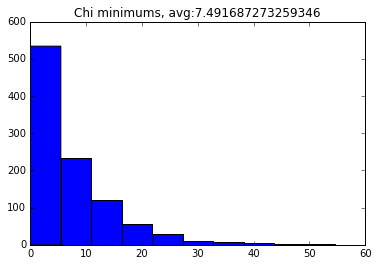

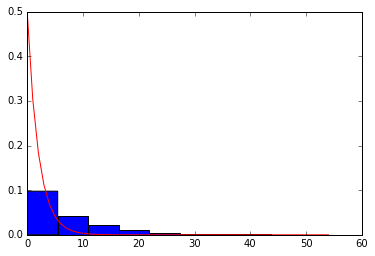

In [50]:
positions = []

noise = 2
Sis = calculate_S_is(S_x, S_y, routers, noise)
 
def chi_squared_xy(xy):
    x,y = xy
    chi = chi_squared(Sis,x, y, routers, sigma=1)
    return chi

packets = range(1000)
xs = []
ys = []
min_chis = []
for packet in packets:
    Sis = calculate_S_is(S_x, S_y, routers, noise)
    x0 = [0,0]
    res = minimize(chi_squared_xy, x0)
    [x,y] = res.x
    min_chis.append(res.fun)
    xs.append(x)
    ys.append(y)

plt.scatter(xs, ys)
plt.show()

plt.hist(xs)
plt.title("X positions, avg:{}".format(np.mean(xs)))
plt.show()

plt.hist(ys)
plt.title("Y positions, avg:{}".format(np.mean(ys)))
plt.show()


plt.hist(min_chis)
plt.title("Chi minimums, avg:{}".format(np.mean(min_chis)))
plt.show()

n, bins, patches = plt.hist(min_chis, normed=1)
mu = 0
k=2
dist = chi2(k, mu)
x = range(math.ceil(max(min_chis)))
plt.plot(x, dist.pdf(x), c='red')
plt.show()



Q: What is the average x- and y- position? What happened to the cloud of estimated device positions, and why? What is the average  2 of the minimums? Does it agree with what you expect? Does your histogram agree with what you expect from a chi-squared distribution? What happened and why?

A: The cloud of estimate device positions has a larger spread compared to the Gaussian fluctuations of 1 dBm. Which is to be expected as we added more noise.
The avarage $\chi^{2}$ is just over 7. It seems that our distribution is now a bit flatter compared to the normal $\chi^2$ distribution.

## r)

Q: What does this tell you about your estimate of the measurement/data uncertainties?
    
A: If we have 10 degrees of freedom we would expect a  $\chi^{2}$  of around 10. However when we have a  $\chi^{2}$  of 40 that suggests the real fluctiations of nois is larger than we expected. As we see in the previous question we had a larger fluctuation than the expected fluctiation, which caused the  $\chi^{2}$  to be too large.

# 0.5 Error on fit parameters

## s)

$$ \chi^2 = \sum_i (\frac{S_i-P_r^i(x,y)}{\sigma_i})^2\\
P_r^i(x,y) \approx P_r^i(x_0,y_0)+\frac{\partial P_r^i(x_0,y_0)}{\partial x}*(x-x_0)+\frac{\partial P_r^i(x_0,y_0)}{\partial y}*(y-y_0)\\
= P_0^i + P_{x,0}^i\Delta x + P_{y,0}^i\Delta y\\
\chi^2 = \sum_i (\frac{S_i-P_0^i - P_{x,0}^i\Delta x - P_{y,0}^i\Delta y}{\sigma_i})^2\\
\chi^2 = \sum_i \frac{1}{\sigma_i^2}(S_i^2 -2S_i(P_0^i+P_{x,0}^i\Delta x+ P_{y,0}^i\Delta y)+ (P_0^i)^2+ 2P_0^i(P_{x,0}^i\Delta x+ P_{y,0}^i\Delta y)+ (P_{x,0}^i\Delta x)^2 + (P_{y,0}^i\Delta y)^2 +  2P_{x,0}^iP_{y,0}^i\Delta x\Delta y)\\
S_i - P_0^i = R_0^i\\
\chi^2 = \sum_i \frac{1}{\sigma_i^2}((R_0^i)^2 - 2R_0^iP_{x,0}^i\Delta x - 2R_0^iP_{y,0}^i\Delta y+ (P_{x,0}^i\Delta x)^2 + (P_{y,0}^i\Delta y)^2 + 2P_{x,0}^iP_{y,0}^i\Delta x\Delta y) $$

## t)

$$\sum_i \frac{1}{\sigma^2}R_0^iP_{x,0}^i = 0\\
\sum_i \frac{1}{\sigma^2}R_0^iP_{y,0}^i = 0\\
%\sum_i \frac{1}{\sigma^2}P_{x,0}^iP_{y,0}^i\Delta x\Delta y &\approx 0\\
\chi^2 = \sum_i \frac{1}{\sigma_i^2}((R_0^i)^2 + (P_{x,0}^i\Delta x)^2 + (P_{y,0}^i\Delta y)^2 + 2P_{x,0}^iP_{y,0}^i\Delta x\Delta y)$$

## u)

In [3]:
%%latex

\begin{align*}
\chi^2 = \sum_i \frac{1}{\sigma_i^2}((R_0^i)^2 + (P_{x,0}^i\Delta x)^2 + (P_{y,0}^i\Delta y)^2
                                      + 2P_{x,0}^iP_{y,0}^i\Delta x\Delta y)\\
\chi^2 = \chi_0^2 + \sum_i \frac{1}{\sigma_i^2}((P_{x,0}^i\Delta x)^2 + (P_{y,0}^i\Delta y)^2
                                      + 2P_{x,0}^iP_{y,0}^i\Delta x\Delta y)\\
= A + 
\left(
\begin{array}{c}
\Delta x & \Delta y
\end{array}
\right)
* B *
\left(
\begin{array}{cc}
\Delta x \\
\Delta y
\end{array}
\right)\\

\left(
\begin{array}{c}
\Delta x & \Delta y
\end{array}
\right)

\left(
\begin{array}{cc}
a & b\\
c & d\\
\end{array}
\right) 

\left(
\begin{array}{cc}
\Delta x \\
\Delta y
\end{array}
\right)
= (\Delta x)^2 a + \Delta x\Delta y(b+c) + (\Delta y)^2 d\\
a = (P_{x,0}^i)^2\\
b + c = 2P_{x,0}^iP_{y,0}^i\\
b = c = P_{x,0}^iP_{y,0}^i\\
d = (P_{y,0}^i)^2\\

A = \chi_0^2\\
B = 
\left(
\begin{array}{cc}
(P_{x,0}^i)^2 & P_{x,0}^iP_{y,0}^i\\
P_{x,0}^iP_{y,0}^i & (P_{y,0}^i)^2\\
\end{array}
\right)

\end{align*}

<IPython.core.display.Latex object>

## v)

$$\chi^2 = \sum_i \frac{1}{\sigma_i^2}(P_{x,0}^i\Delta x)^2 = 1\\
\chi^2 = \frac{1}{\sigma_i^2}(P_{x,0}^i\Delta x)^2 = 1\\
(\frac{\sigma_i}{P_{x,0}^i})^2 = (\Delta x)^2\\
\Delta x = \pm \frac{\sigma_i}{P_{x,0}^i}\\
\text{The same procedure gives:}\\
\Delta y = \pm \frac{\sigma_i}{P_{y,0}^i}$$